---


<img width=25% src="https://raw.githubusercontent.com/gabrielcapela/Credit-Card-Fraud-Detection-/main/images/myself.png" align=right>

# **Fetal Health Classification Project**

*by Gabriel Capela*

[<img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>](https://www.linkedin.com/in/gabrielcapela)
[<img src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white" />](https://medium.com/@gabrielcapela)

---

**Reducing child mortality** is a fundamental goal of global health initiatives and a key indicator of human progress. The United Nations aims to eliminate preventable deaths of newborns and children under five by 2030, targeting an under‑5 mortality rate below 25 per 1,000 live births. Maternal mortality is another critical issue, with most deaths occurring in low-resource settings and being largely preventable.

Cardiotocography (CTG) offers a cost-effective and non-invasive method to assess fetal health, monitoring fetal heart rate (FHR), movements, and uterine contractions. **This project leverages AutoML techniques to classify fetal health conditions** based on CTG data, aiming to support early diagnosis and intervention, ultimately contributing to maternal and child health improvements.
<p align="center">
<img width=50% src="https://github.com/gabrielcapela/AutoML_Classification/blob/main/aditya-romansa-5zp0jym2w9M-unsplash.jpg?raw=true">
</p>

The purpose of this project is to apply **Automated Machine Learning**, in order to demonstrate the practicality of this type of tool. The data used was taken from [Kaggle](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification?resource=download).

# Business Understanding 

Child and maternal health are critical indicators of a country’s overall development and healthcare quality. The **reduction of child mortality is a priority** within the United Nations Sustainable Development Goals (SDGs), aiming to lower preventable deaths of newborns and children under five years old. The UN targets an under-5 mortality rate of at most 25 per 1,000 live births by 2030. Similarly, maternal mortality remains a major global health challenge, with approximately 295,000 deaths occurring during pregnancy and childbirth in 2017, 94% of which took place in low-resource settings. Many of these deaths could have been prevented with timely medical intervention.

One of the most effective methods to assess fetal health and reduce risks to both mother and baby is **Cardiotocography** (CTG). This technology is a non-invasive, cost-effective diagnostic tool that monitors fetal heart rate (FHR), fetal movements, uterine contractions, and other physiological parameters. By analyzing CTG data, **healthcare professionals can detect early signs of fetal distress**, allowing for timely medical decisions that may prevent complications such as stillbirths, hypoxia, and premature birth-related issues.

Despite its effectiveness, **the interpretation of CTG data remains challenging and subjective**, as it relies heavily on the expertise of healthcare providers. Classification systems powered by Machine Learning can significantly enhance this process by providing consistent, data-driven assessments of fetal health conditions. By leveraging historical CTG data, an ML approach can help classify fetal health status into categories such as:

*   Normal: No signs of distress, healthy fetal condition.
*   Suspicious: Potential risk factors that may require further observation.
*   Pathological: Clear indicators of fetal distress, requiring immediate medical intervention.

This project aims to develop an **AutoML model** capable of classifying fetal health status based on CTG data. By doing so, it seeks to:

1.  Improve diagnostic accuracy by reducing human subjectivity in CTG interpretation.
2.  Assist healthcare professionals in making faster and more informed decisions.
3.  Enhance maternal and child health outcomes by enabling earlier interventions.

Ultimately, this initiative contributes to public health efforts by providing a data-driven approach to fetal health assessment, supporting medical professionals in preventing perinatal complications and aligning with global healthcare goals.

# Data Understanding

The dataset used can be downloaded from this [page](https://github.com/gabrielcapela/AutoML_Classification/blob/f36182cf3a150ce48632b0531ddd6373b2c0e3f9/fetal_health.csv).

## Obtaining and Summary Analysis of Data

Let's start by importing the data and previewing the first few rows to illustrate the meaning of each column:

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
df = pd.read_csv('https://github.com/gabrielcapela/AutoML_Classification/raw/refs/heads/main/fetal_health.csv')
#Showing the first 5 lines
print(f"The data has {df.shape[0]} rows and {df.shape[1]} variables")
df.head()

The data has 2126 rows and 22 variables


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Below is the meaning of each variable:

*   **baseline_value**: the mean fetal heart rate (FHR) in beats per minute (bpm).
*   **accelerations**: the mean number of FHR accelerations per second.
*   **fetal_movement**: the mean number of detected fetal movements per second.
*   **uterine_contractions**: the mean number of detected uterine contractions per second.
*   **light_decelerations**: the mean number of mild FHR decelerations per second.
*   **severe_decelerations**: the mean number of severe FHR decelerations per second.
*   **prolongued_decelerations**: the mean number of prolonged FHR decelerations per second.
*   **abnormal_short_term_variability**: the percentage of time with abnormal short-term FHR variability.
*   **mean_value_of_short_term_variability**: the mean value of short-term FHR variability in bpm.
*   **percentage_of_time_with_abnormal_long_term_variability**: the percentage of time with abnormal long-term FHR variability.
*   **mean_value_of_long_term_variability**: the mean value of long-term FHR variability in bpm.
*   **histogram_width**: the width of the FHR histogram, indicating the range of variations.
*   **histogram_min:** the minimum recorded FHR value in the histogram.
*   **histogram_max**: the maximum recorded FHR value in the histogram.
*   **histogram_number_of_peaks**: the number of peaks in the FHR histogram.
*   **histogram_number_of_zeroes**: the number of zero values in the FHR histogram.
*   **histogram_mode**: the most frequent FHR value.
*   **histogram_mean**: the mean FHR value recorded in the histogram.
*   **histogram_median**: the median FHR value recorded in the histogram.
*   **histogram_variance**: the variance of FHR values in the histogram, indicating dispersion.
*   **histogram_tendency**: the overall tendency of the FHR histogram (positive values indicate an upward trend, negative values indicate a downward trend).

*   **fetal_health**: the classification of fetal health status:

1 → Normal

2 → Suspect

3 → Pathological

## Pandas Profiling

In order to explore AutoML tools, I will be using **Pandas Profiling**, which is a powerful tool that automates exploratory data analysis (EDA) and makes it easy to visualize and understand the characteristics of a dataset. With the ability to **generate interactive reports in HTML** format, it provides detailed insights into each variable, such as distributions, missing values, and outliers.

In [3]:
# Importing the required package
from ydata_profiling import ProfileReport

# Creating the report
profile = ProfileReport(df, title="Report", explorative=True)

# Transforming to html format
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Click [**HERE**](https://gabrielcapela.github.io/fetal_health_classification/report.html) to see the report

**Some observations** can already be made:

*   The dataset shows several very **strong correlations** between certain variables, especially between histogram-related features (such as histogram_mean, histogram_max, histogram_median, etc.) and variability variables, such as abnormal_short_term_variability and mean_value_of_short_term_variability. These correlations indicate that the variables may be measuring similar aspects of the same information.

*   The dataset contains **11 duplicate rows** (0.5%), which means that some observations are repeated. This can distort the model's results, since the model may "learn" patterns incorrectly from these repetitions. These duplicates will be removed before PyCaret takes action, to prevent the model from overfitting redundant data, which can negatively impact performance.

*   The severe_decelerations variable is **significantly unbalanced**, with 96.8% of the data concentrated in a single class. However, it is worth noting that this is not the target variable of the model, which means that its impact on model training may be indirect.
T
*   The **fetal_health target** variable is unbalanced across its three classes; PyCaret will be configured to handle this issue.

*   Several variables, such as accelerations, fetal_movement, and prolonged_decelerations, have a **large number of zero values**. These zeros are probably not input errors, but rather indications that, at the time of the scan, these events did not occur. Therefore, these zeros can be interpreted as valid information and represent the absence of certain features in the fetal scan.

# Data Preparation

As a first action we will delete the duplicate lines

In [4]:
# Deleting duplicate rows
print(f'Rows deleted: {len(df) - len(df.drop_duplicates())}')
# Drop the duplicates
df.drop_duplicates(inplace=True)

Rows deleted: 13


## About PyCaret

**PyCaret** is a Python AutoML library that simplifies the process of building, testing, and optimizing machine learning models. It automates tasks such as model selection, hyperparameter tuning, and performance evaluation, making the workflow faster and more accessible.

For more details, visit [PyCaret](https://pycaret.org).

PyCaret already performs several steps of **data preprocessing automatically**, such as missing value treatment, categorical variable encoding, feature scaling, and outlier detection. Manual preprocessing can sometimes lead to better results, but we will stick to PyCaret’s built-in capabilities to **evaluate the efficiency of AutoM**L.

## Division of data

Although PyCaret already automatically splits the data into training and testing data within the setup() function, choosing to **pre-separate a training set before** delivering it to AutoML can bring important benefits to the reliability and robustness of the model evaluation. One of the benefits, for example, is avoiding data leakage – If the model is optimized based on PyCaret's internal test set, it can indirectly "learn" patterns that it would not have in a real application.
Having an external set for final validation – This allows a more realistic evaluation of the model's performance before putting it into production.

In [5]:
# Separating data into test and training
test = df.sample(frac=0.15, random_state=42)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

print(test.shape)
print(train.shape)

(317, 22)
(1796, 22)


# Modeling

In [6]:
# Importing the necessary packages
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification  import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification  import save_model, load_model

## Creating the pipeline


PyCaret's setup() is the main function for initializing a machine learning experiment. It prepares the data, sets up the pipeline configuration, and applies preprocessing automatically.

When we call setup(), PyCaret creates a pipeline that includes steps such as missing value handling, categorical variable encoding, normalization, outlier removal, and feature selection. This pipeline is automatically applied to all trained models, ensuring consistency and **eliminating the need to repeat these steps manually**.

In [8]:
# Initializing the PyCaret environment with target variable balancing
classification_setup = setup(
    data=train, 
    target='fetal_health',
    fix_imbalance=True,  
    normalize=True,  
    session_id=42,  
    experiment_name='test_01'
)

,Description,Value
0,Session id,42
1,Target,fetal_health
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 3.0: 2"
4,Original data shape,"(1796, 22)"
5,Transformed data shape,"(3455, 22)"
6,Transformed train set shape,"(2916, 22)"
7,Transformed test set shape,"(539, 22)"
8,Numeric features,21
9,Preprocess,True


## Comparing the models

PyCaret's **compare_models()** function automatically evaluates multiple classification models and compares them based on performance metrics. It uses 10-fold cross-validation (fold=10), ensuring a more robust evaluation by splitting the training data into 10 parts and averaging the results.

By default, models are evaluated using the following metrics:

*   **Accuracy**: The percentage of correct predictions.
*   **AUC** (Area Under the Curve): Measures the model’s ability to distinguish between classes.
*   **Recall**: The proportion of true positive predictions among all actual positives.
*   **Precision**: The proportion of true positive predictions among all positive predictions.
*   **F1 Score**: The harmonic mean of precision and recall, balancing both metrics.
*   **Kappa**: Measures the agreement between predicted and actual classes, adjusted for chance.
*   **MCC**(Matthews Correlation Coefficient): Measures the quality of classification considering all confusion matrix outcomes, useful for imbalanced problems.

This function allows you to quickly identify the best-performing model based on your preferred metric, without having to manually train and tune each model.

In this project we will choose **AUC-ROC** (Area Under the Curve - Receiver Operating Characteristic) as the evaluation metric for this fetal health classification problem, as this metric measures the model's ability to distinguish between the three classes, regardless of any class imbalance.

In [11]:
# Now running compare_models using the AUC metric for ordering
best = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9308,0.9827,0.9308,0.9320,0.9299,0.8145,0.8162,0.4680
lightgbm,Light Gradient Boosting Machine,0.9308,0.9814,0.9308,0.9306,0.9294,0.8119,0.8134,2.1490
rf,Random Forest Classifier,0.9244,0.9812,0.9244,0.9251,0.9237,0.7979,0.7993,0.4930
catboost,CatBoost Classifier,0.9340,0.9797,0.9340,0.9344,0.9332,0.8226,0.8237,12.5300
et,Extra Trees Classifier,0.9236,0.9776,0.9236,0.9242,0.9222,0.7926,0.7942,0.3310
knn,K Neighbors Classifier,0.8806,0.9502,0.8806,0.9069,0.8882,0.7156,0.7272,0.0690
nb,Naive Bayes,0.7446,0.9280,0.7446,0.8697,0.7757,0.4908,0.5414,0.0600
dt,Decision Tree Classifier,0.8998,0.8766,0.8998,0.9026,0.8998,0.7357,0.7375,0.0750
dummy,Dummy Classifier,0.7733,0.5000,0.7733,0.5980,0.6744,0.0000,0.0000,0.0870
lr,Logistic Regression,0.8735,0.0000,0.8735,0.9024,0.8822,0.7018,0.7137,2.1930


In [12]:
# Checking the best model 
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)


## Instantiating the model

PyCaret's compare_models() function **does not train** a definitive model, it simply evaluates and compares different classification algorithms, displaying a grid with their performance metrics. To use a specific model, **you need to select and instantiate it manually** using the create_model() function.

The chosen model is the **XGBoost (Extreme Gradient Boosting)**, which is a machine learning library based on the gradient boosting technique, which uses decision trees to iteratively improve the model. It is highly efficient, fast, and allows regularization, parallelization, and handling of missing values.

In [14]:
# Instantiating the model
xgboost = create_model('xgboost')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:56:53
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9206,0.9818,0.9206,0.9183,0.9140,0.7765,0.7810
1,0.8968,0.9647,0.8968,0.8970,0.8967,0.7247,0.7249
2,0.9444,0.9943,0.9444,0.9469,0.9454,0.8574,0.8582
3,0.9603,0.9915,0.9603,0.9632,0.9592,0.8928,0.8950
4,0.9683,0.9937,0.9683,0.9683,0.9683,0.9163,0.9163
5,0.9444,0.9866,0.9444,0.9444,0.9444,0.8535,0.8535
6,0.8968,0.9666,0.8968,0.8935,0.8916,0.7074,0.7124
7,0.9200,0.9838,0.9200,0.9287,0.9225,0.7985,0.8026
8,0.9200,0.9737,0.9200,0.9223,0.9205,0.7877,0.7882


## Model Tuning

The Model Tuning step in PyCaret consists of **adjusting the model's hyperparameters** to optimize its performance. Instead of using default values, this phase **searches for the best combination of parameters** through techniques such as Random Grid Search.

In [15]:
# Hyperparameter tuning
tuned_xgboost = tune_model(xgboost, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9206,0.9844,0.9206,0.9163,0.9134,0.7730,0.7784
1,0.8810,0.9568,0.8810,0.8835,0.8821,0.6820,0.6822
2,0.9444,0.9945,0.9444,0.9475,0.9457,0.8574,0.8582
3,0.9444,0.9871,0.9444,0.9453,0.9424,0.8499,0.8520
4,0.9603,0.9922,0.9603,0.9616,0.9607,0.8953,0.8954
5,0.9444,0.9882,0.9444,0.9444,0.9444,0.8535,0.8535
6,0.8968,0.9637,0.8968,0.8935,0.8916,0.7074,0.7124
7,0.9280,0.9855,0.9280,0.9349,0.9303,0.8161,0.8189
8,0.9120,0.9736,0.9120,0.9153,0.9130,0.7695,0.7704


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In this case, the tuned model did not present better results than the original. However, it is worth **highlighting the importance and practicality** of this function.

# Evaluation

## Confusion Matrix

PyCaret's **plot_model()** function is used to generate different Machine Learning model evaluation graphs, such as the confusion matrix.

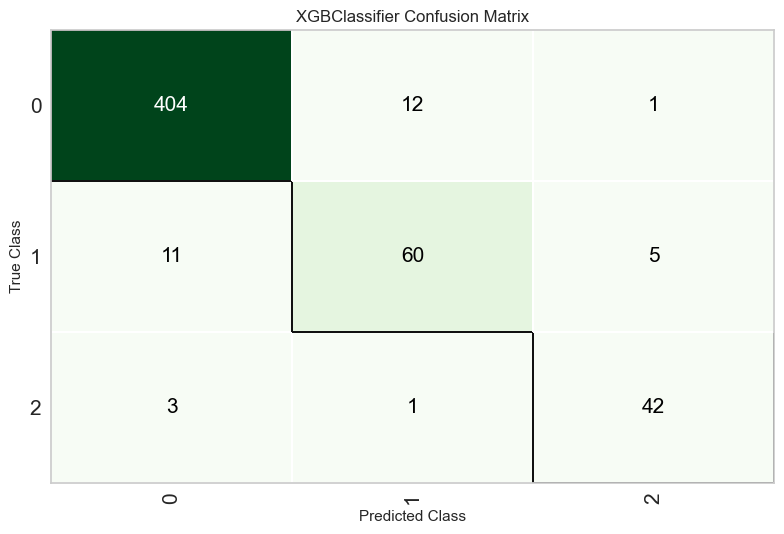

In [16]:
# Showing the confusion matrix
plot_model(tuned_xgboost, plot='confusion_matrix')

*   The model performs very well in class 0 (the most common), with a **high accuracy rate**.
*   There is significant **confusion between classes 1 and 0**, which may indicate a problem in distinguishing intermediate cases.
*   Class 2, which is the most critical, **has good accuracy, but some cases are being confused** with less severe classes, which may represent a risk in real applications.

## Making the predictions

The predict_model() function in PyCaret is used to **generate predictions with a previously trained and tuned model**. It can be applied to both test data and new data sets to evaluate the model's performance.

When called without a specific data set, predict_model(tuned_xgboost) **returns predictions for the test data automatically separated by PyCaret**.

Later on, we will also use it for data separated at the beginning, never exposed to PyCaret.

In [18]:
# Making the predictions
predict_model(tuned_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9388,0.9870,0.9388,0.9383,0.9385,0.8360,0.8361


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,prediction_label,prediction_score
661,137.0,0.000,0.004,0.001,0.000,0.0,0.000,75.0,0.2,30.0,...,2.0,0.0,138.0,139.0,139.0,1.0,0.0,2.0,2,0.9998
806,136.0,0.001,0.000,0.002,0.005,0.0,0.002,24.0,2.3,0.0,...,6.0,2.0,126.0,115.0,122.0,57.0,0.0,3.0,3,0.7408
1527,143.0,0.000,0.000,0.001,0.000,0.0,0.000,68.0,0.3,6.0,...,1.0,0.0,144.0,144.0,146.0,1.0,0.0,1.0,1,0.9975
202,123.0,0.003,0.005,0.000,0.000,0.0,0.000,55.0,0.7,0.0,...,4.0,0.0,129.0,129.0,130.0,3.0,1.0,1.0,1,0.9999
237,123.0,0.003,0.000,0.002,0.000,0.0,0.000,37.0,0.9,0.0,...,2.0,0.0,125.0,127.0,127.0,4.0,1.0,1.0,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,140.0,0.000,0.001,0.003,0.008,0.0,0.000,61.0,1.3,0.0,...,6.0,1.0,142.0,134.0,143.0,25.0,1.0,1.0,1,0.9937
1276,130.0,0.002,0.000,0.006,0.000,0.0,0.000,47.0,0.7,30.0,...,4.0,0.0,137.0,136.0,138.0,2.0,0.0,1.0,1,0.9999
1158,132.0,0.005,0.000,0.002,0.003,0.0,0.000,26.0,1.5,0.0,...,9.0,1.0,143.0,137.0,142.0,26.0,1.0,1.0,1,1.0000
827,131.0,0.000,0.000,0.008,0.009,0.0,0.000,25.0,2.4,3.0,...,7.0,1.0,136.0,120.0,134.0,82.0,1.0,1.0,1,0.9988


We can see the AUC metric with 0.9870, **very similar** to the 0.9827 obtained with the training data.

## Finalizing the model

The finalize_model() function in PyCaret is used to train the fine-tuned model on the **entire available dataset**, ensuring that it uses as much information as possible before deploying it.

By default, PyCaret sets aside a portion of the data for testing, but **when finalizing the model, it is re-trained using 100% of the training data** to improve generalization before deploying it to new data.

In [20]:
# Finalizing the model
final_lightgbm = finalize_model(tuned_xgboost)

In [21]:
type(tuned_xgboost)

xgboost.sklearn.XGBClassifier

In [23]:
# Making predictions with the model trained with all the data provided to PyCaret
pred_holdout = predict_model(tuned_xgboost, data=train)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9811,0.9975,0.9811,0.9810,0.9810,0.9494,0.9494


As expected, we have better metrics (AUC = 0.9975), as the model is being tested with data used in its training (**overfitting**).

In [24]:
# Checking the parameters
print(tuned_xgboost)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)


## Predicting on new data


We will use the **separate dataset before using Pycaret**, so as to ensure the reliability of the model.

In [25]:
# Making Predictions with Unseen Data
unseen_predictions = predict_model(tuned_xgboost, data=test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9590,0.9901,0.9590,0.9635,0.9604,0.8788,0.8809


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,prediction_label,prediction_score
0,144.0,0.002,0.010,0.002,0.000,0.0,0.0,76.0,0.6,0.0,...,2.0,0.0,156.0,153.0,155.0,5.0,0.0,2.0,1,0.9688
1,125.0,0.005,0.002,0.006,0.009,0.0,0.0,60.0,1.3,0.0,...,6.0,1.0,110.0,120.0,120.0,34.0,0.0,1.0,1,0.9998
2,120.0,0.013,0.006,0.003,0.000,0.0,0.0,40.0,1.3,0.0,...,5.0,1.0,133.0,134.0,136.0,9.0,1.0,1.0,1,1.0000
3,142.0,0.000,0.006,0.000,0.000,0.0,0.0,61.0,0.7,52.0,...,12.0,0.0,143.0,142.0,144.0,3.0,1.0,2.0,2,0.9962
4,145.0,0.000,0.000,0.002,0.000,0.0,0.0,49.0,0.6,3.0,...,0.0,0.0,159.0,156.0,158.0,3.0,1.0,2.0,2,0.9965


AUC of 0.9901, **very similar** to the results obtained by the PyCaret test set, making the model acceptable.

# Saving the model

The save_model() function is used to save a trained and finalized model, allowing it to be easily loaded and used later without the need for retraining. This is especially **useful for production deployment**, where the model can be saved and reused to make predictions in real time or on new datasets.

The model is saved in a pickle file format (.pkl), which makes it easy to store and portable across environments.

In [27]:
save_model(tuned_xgboost,'Final_Model_03_08_25')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['baseline value', 'accelerations',
                                              'fetal_movement',
                                              'uterine_contractions',
                                              'light_decelerations',
                                              'severe_decelerations',
                                              'prolongued_deceleratio...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_oneh

## Loading a model

In [29]:
# Loading a saved model
saved_final_gbr = load_model('Final_Model_03_08_25')

Transformation Pipeline and Model Successfully Loaded


In [30]:
# Making new predictions with the saved model
new_prediction = predict_model(saved_final_gbr, data=test)
new_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9590,0.9901,0.9590,0.9635,0.9604,0.8788,0.8809


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,prediction_label,prediction_score
0,144.0,0.002,0.010,0.002,0.000,0.0,0.0,76.0,0.6,0.0,...,2.0,0.0,156.0,153.0,155.0,5.0,0.0,2.0,1,0.9688
1,125.0,0.005,0.002,0.006,0.009,0.0,0.0,60.0,1.3,0.0,...,6.0,1.0,110.0,120.0,120.0,34.0,0.0,1.0,1,0.9998
2,120.0,0.013,0.006,0.003,0.000,0.0,0.0,40.0,1.3,0.0,...,5.0,1.0,133.0,134.0,136.0,9.0,1.0,1.0,1,1.0000
3,142.0,0.000,0.006,0.000,0.000,0.0,0.0,61.0,0.7,52.0,...,12.0,0.0,143.0,142.0,144.0,3.0,1.0,2.0,2,0.9962
4,145.0,0.000,0.000,0.002,0.000,0.0,0.0,49.0,0.6,3.0,...,0.0,0.0,159.0,156.0,158.0,3.0,1.0,2.0,2,0.9965
